In [169]:
open('access_log_Jul95.log').readline()

'199.72.81.55 - - [01/Jul/1995:00:00:01 -0400] "GET /history/apollo/ HTTP/1.0" 200 6245\n'

In [170]:
import pandas as pd

In [171]:
data = pd.read_table('access_log_Jul95.log', sep=' - - ', header=None, names=['addr','string'])

/Users/elena/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [177]:
data.head()

,addr,string,DateTime,url
0,199.72.81.55,"[01/Jul/1995:00:00:01 -0400] ""GET /history/apo...",1995-07-01 00:00:01,/history/apollo/
1,unicomp6.unicomp.net,"[01/Jul/1995:00:00:06 -0400] ""GET /shuttle/cou...",1995-07-01 00:00:06,/shuttle/countdown/
2,199.120.110.21,"[01/Jul/1995:00:00:09 -0400] ""GET /shuttle/mis...",1995-07-01 00:00:09,/shuttle/missions/sts-73/mission-sts-73.html
3,burger.letters.com,"[01/Jul/1995:00:00:11 -0400] ""GET /shuttle/cou...",1995-07-01 00:00:11,/shuttle/countdown/liftoff.html
4,199.120.110.21,"[01/Jul/1995:00:00:11 -0400] ""GET /shuttle/mis...",1995-07-01 00:00:11,/shuttle/missions/sts-73/sts-73-patch-small.gif


In [173]:
data['DateTime'] = data.string.str[1:21]
data['DateTime'] = pd.to_datetime(data.DateTime, format="%d/%b/%Y:%H:%M:%S")

In [176]:
data['url'] = data.string.str[34:]
data['url'] = data.url.astype(str).apply(lambda x:x.split(" ")[0])

In [178]:
data['request_size'] = data.string.astype(str).apply(lambda x:x.split(" ")[len(x.split(' '))-1]) #.astype(int)
data.loc[data['request_size']=='-', 'request_size'] =0
data.loc[data['request_size']=='None', 'request_size'] =0
data['request_size'] = data['request_size'].astype(int)

In [179]:
data.head()

,addr,string,DateTime,url,request_size
0,199.72.81.55,"[01/Jul/1995:00:00:01 -0400] ""GET /history/apo...",1995-07-01 00:00:01,/history/apollo/,6245
1,unicomp6.unicomp.net,"[01/Jul/1995:00:00:06 -0400] ""GET /shuttle/cou...",1995-07-01 00:00:06,/shuttle/countdown/,3985
2,199.120.110.21,"[01/Jul/1995:00:00:09 -0400] ""GET /shuttle/mis...",1995-07-01 00:00:09,/shuttle/missions/sts-73/mission-sts-73.html,4085
3,burger.letters.com,"[01/Jul/1995:00:00:11 -0400] ""GET /shuttle/cou...",1995-07-01 00:00:11,/shuttle/countdown/liftoff.html,0
4,199.120.110.21,"[01/Jul/1995:00:00:11 -0400] ""GET /shuttle/mis...",1995-07-01 00:00:11,/shuttle/missions/sts-73/sts-73-patch-small.gif,4179


In [180]:
print("САМЫЕ ПОСЩАЕМЫЕ:")
data['url'].value_counts()[:15]

САМЫЕ ПОСЩАЕМЫЕ:


/images/NASA-logosmall.gif                 110738
/images/KSC-logosmall.gif                   89357
/images/MOSAIC-logosmall.gif                59969
/images/USA-logosmall.gif                   59516
/images/WORLD-logosmall.gif                 58999
/images/ksclogo-medium.gif                  58413
/images/launch-logo.gif                     40780
/shuttle/countdown/                         40145
/ksc.html                                   39862
/images/ksclogosmall.gif                    33528
/                                           32614
/history/apollo/images/apollo-logo1.gif     31011
/shuttle/missions/missions.html             24746
/htbin/cdt_main.pl                          22572
/shuttle/countdown/count.gif                22167
Name: url, dtype: int64

In [181]:
import matplotlib.pyplot as plt
%matplotlib inline 

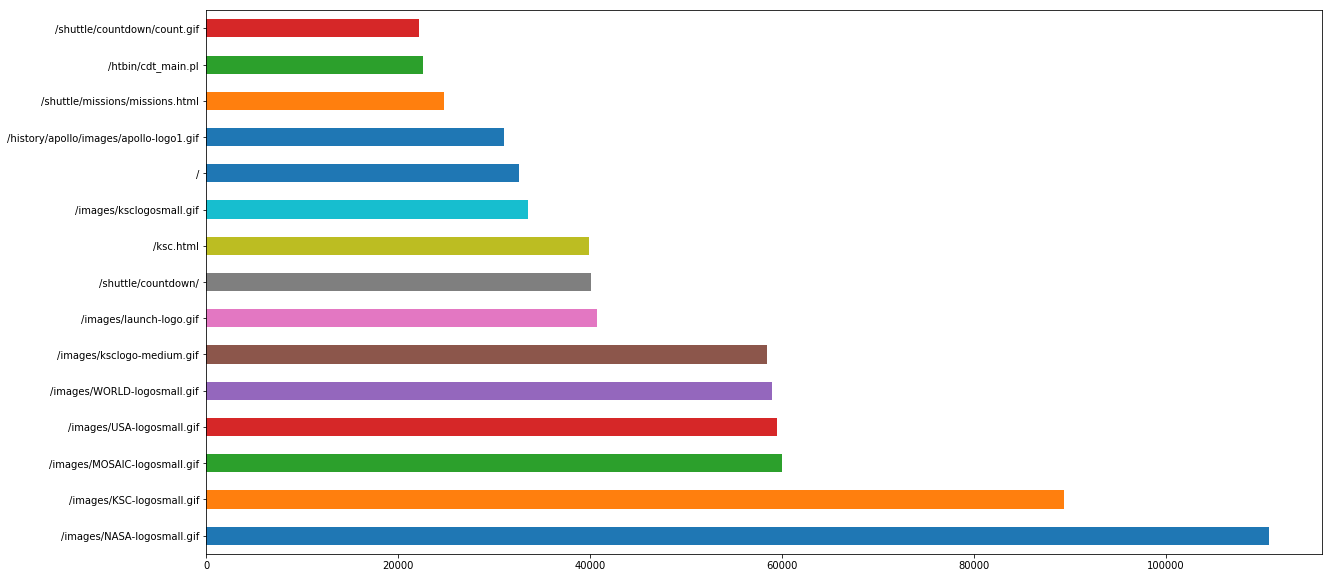

In [182]:
data['url'].value_counts()[:15].plot.barh(figsize=(20,10))

In [183]:
print("ЧИСЛО ЗАПРОСОВ В КАЖДУЮ СЕКУНДУ:")
data.groupby(['DateTime'])['DateTime'].count()

ЧИСЛО ЗАПРОСОВ В КАЖДУЮ СЕКУНДУ:


DateTime
1995-07-01 00:00:01    1
1995-07-01 00:00:06    1
1995-07-01 00:00:09    1
1995-07-01 00:00:11    2
1995-07-01 00:00:12    3
1995-07-01 00:00:13    2
1995-07-01 00:00:14    3
1995-07-01 00:00:15    3
1995-07-01 00:00:17    2
1995-07-01 00:00:18    1
1995-07-01 00:00:19    2
1995-07-01 00:00:24    1
1995-07-01 00:00:25    1
1995-07-01 00:00:27    1
1995-07-01 00:00:29    1
1995-07-01 00:00:33    1
1995-07-01 00:00:35    1
1995-07-01 00:00:37    1
1995-07-01 00:00:38    1
1995-07-01 00:00:40    1
1995-07-01 00:00:41    5
1995-07-01 00:00:43    1
1995-07-01 00:00:44    1
1995-07-01 00:00:50    1
1995-07-01 00:00:54    1
1995-07-01 00:00:58    1
1995-07-01 00:00:59    2
1995-07-01 00:01:02    1
1995-07-01 00:01:04    3
1995-07-01 00:01:05    1
                      ..
1995-07-28 13:31:46    4
1995-07-28 13:31:47    3
1995-07-28 13:31:49    6
1995-07-28 13:31:50    5
1995-07-28 13:31:51    3
1995-07-28 13:31:52    2
1995-07-28 13:31:53    2
1995-07-28 13:31:54    1
1995-07-28 13:31

In [184]:
print("СРЕДНЕЕ ЧИСЛО ЗАПРОСОВ В СЕКУНДУ:")
data.groupby(['DateTime'])['DateTime'].count().mean()

СРЕДНЕЕ ЧИСЛО ЗАПРОСОВ В СЕКУНДУ:


1.720055864804264

In [185]:
print("МАКСИМАЛЬНОЕ ЧИСЛО ЗАПРОСОВ В СЕКУНДУ:")
data.groupby(['DateTime'])['DateTime'].count().max()

МАКСИМАЛЬНОЕ ЧИСЛО ЗАПРОСОВ В СЕКУНДУ:


20

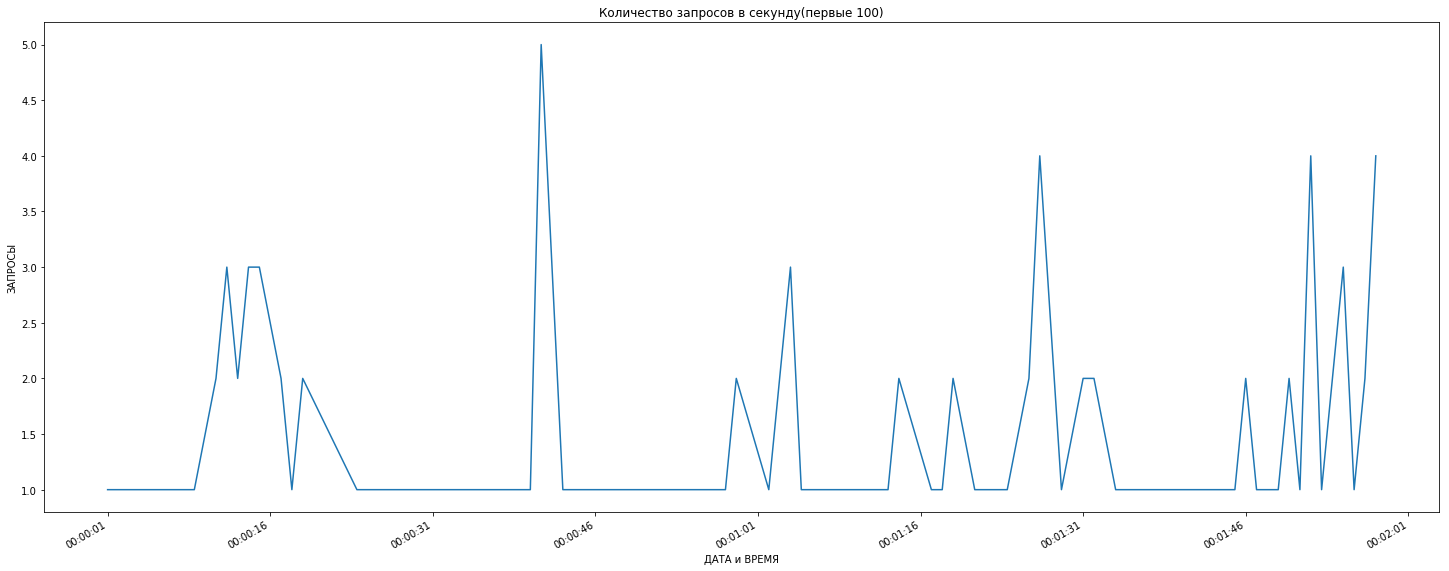

In [186]:
data[:100].groupby(['DateTime'])['DateTime'].count().plot(figsize=(25,10))
plt.xlabel('ДАТА и ВРЕМЯ')
plt.ylabel('ЗАПРОСЫ')
plt.title('Количество запросов в секунду(первые 100)')
plt.show()

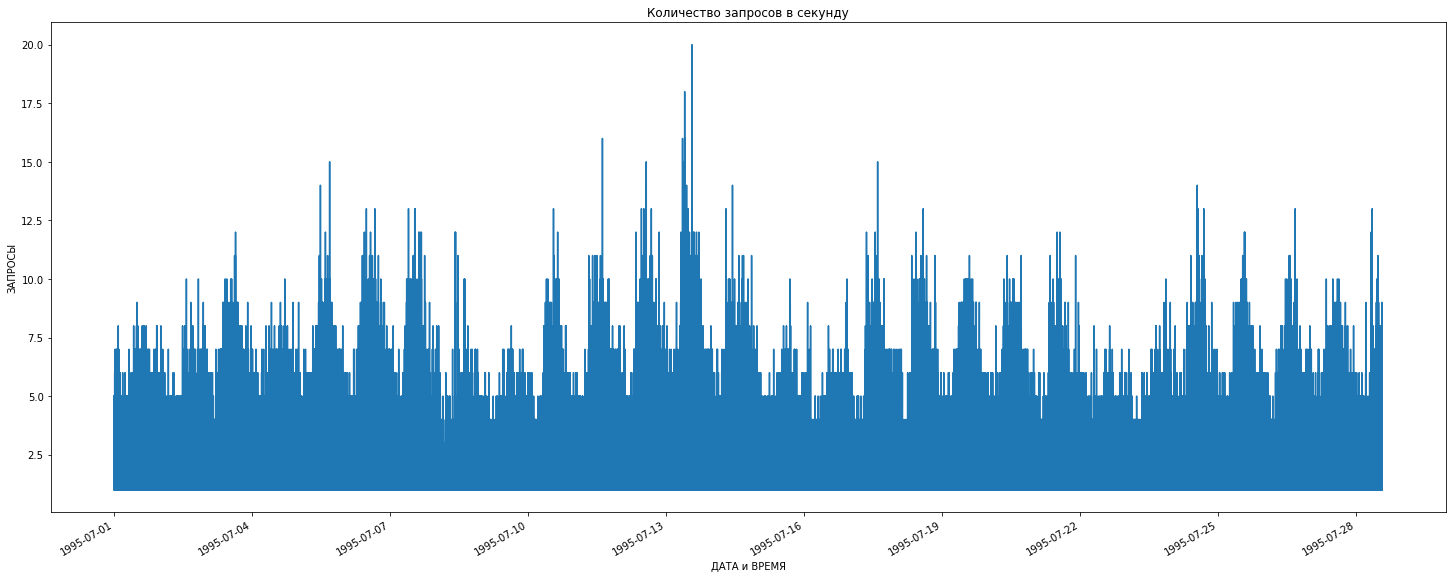

In [187]:
data.groupby(['DateTime'])['DateTime'].count().plot(figsize=(25,10))
plt.xlabel('ДАТА и ВРЕМЯ')
plt.ylabel('ЗАПРОСЫ')
plt.title('Количество запросов в секунду')
plt.show()

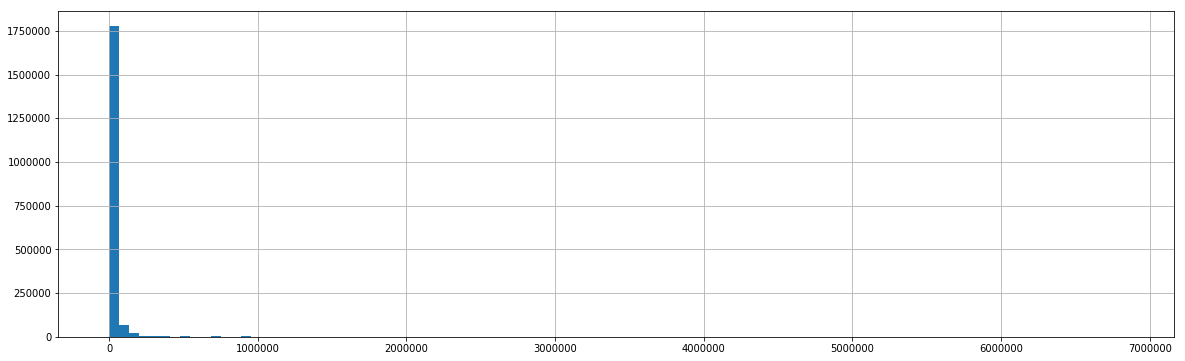

In [188]:
data['request_size'].hist(bins=100, figsize=(20,6))

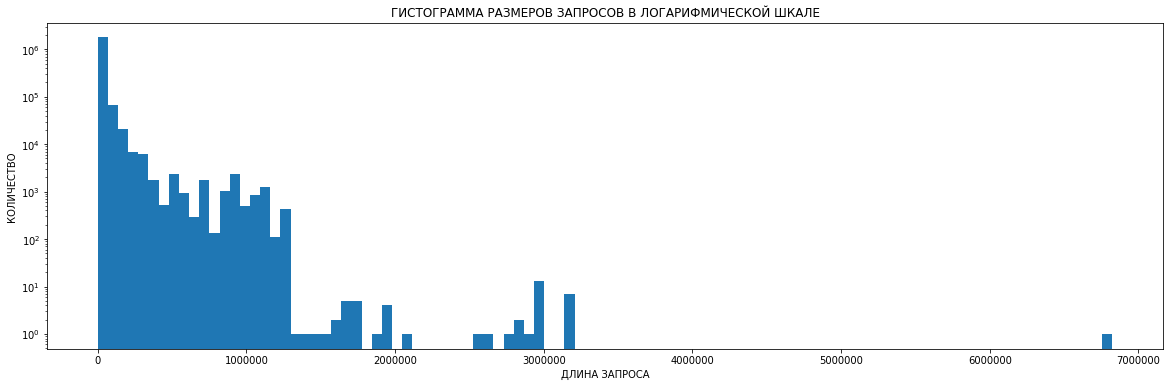

In [189]:
plt.figure(figsize=(20,6))
plt.hist(data['request_size'], bins = 100, log=True) 
plt.xlabel('ДЛИНА ЗАПРОСА')
plt.ylabel('КОЛИЧЕСТВО')
plt.title('ГИСТОГРАММА РАЗМЕРОВ ЗАПРОСОВ В ЛОГАРИФМИЧЕСКОЙ ШКАЛЕ')
plt.show()